In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df = df.drop(columns=["Unnamed: 0"],axis=1)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


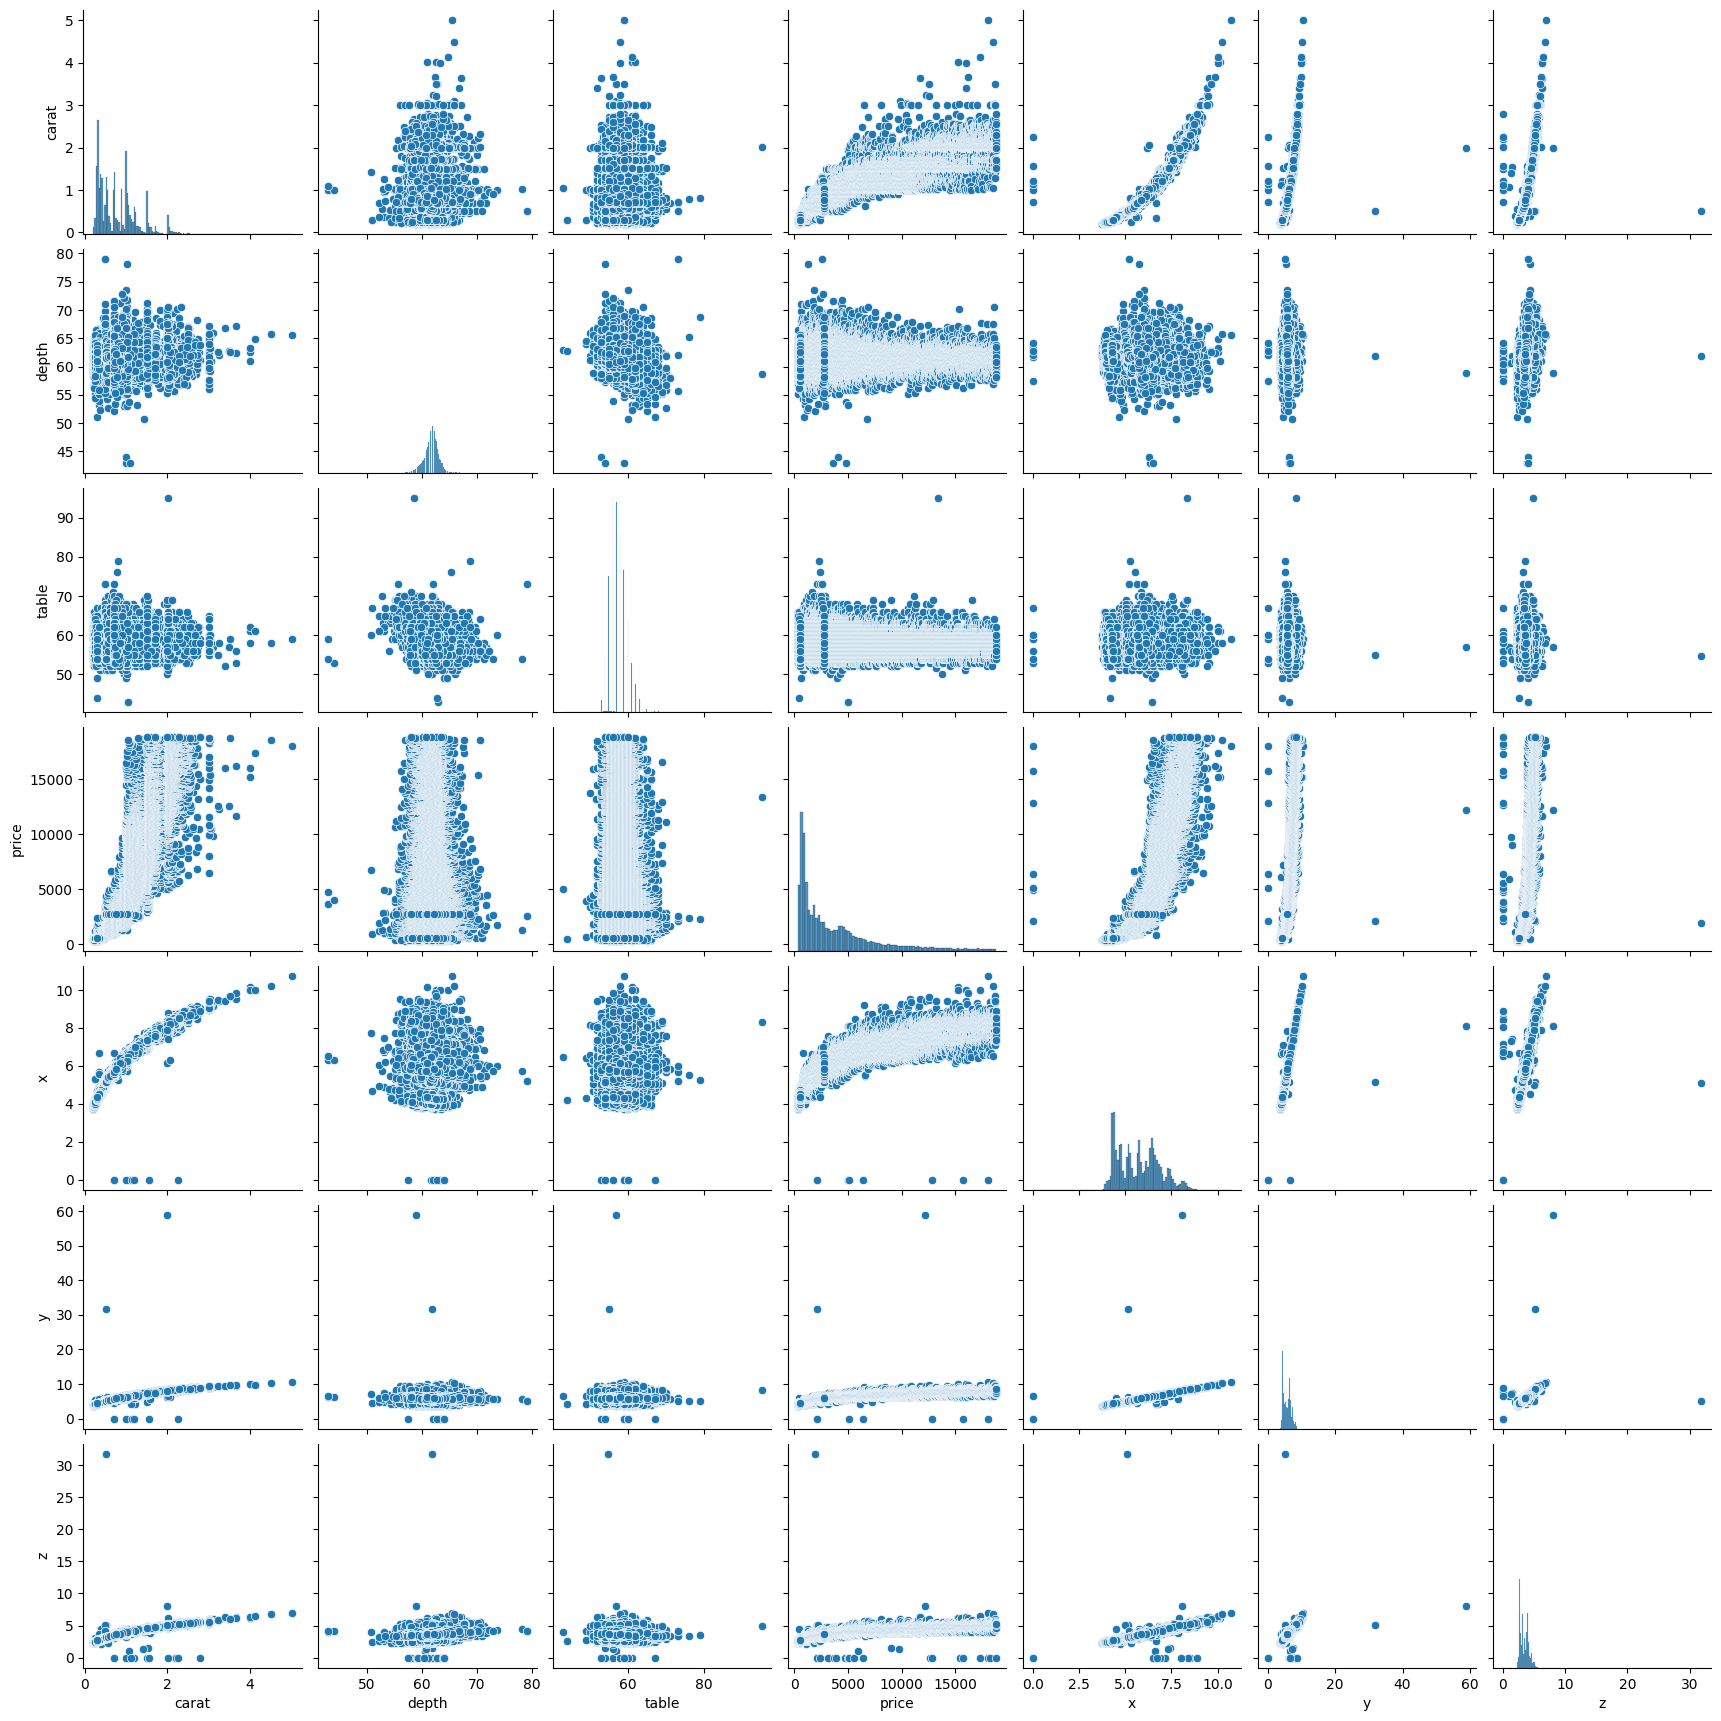

In [9]:
sns.pairplot(df)
plt.show()

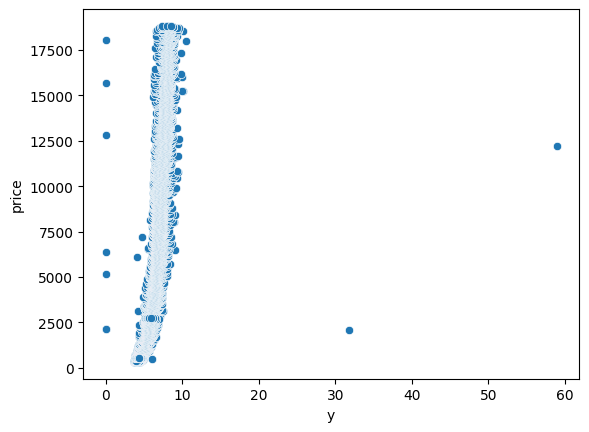

In [10]:
sns.scatterplot(x=df["y"], y=df["price"])
plt.show()

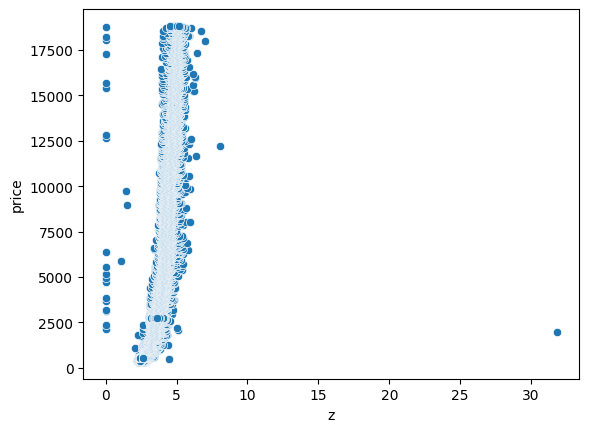

In [11]:
sns.scatterplot(x=df["z"], y=df["price"])
plt.show()

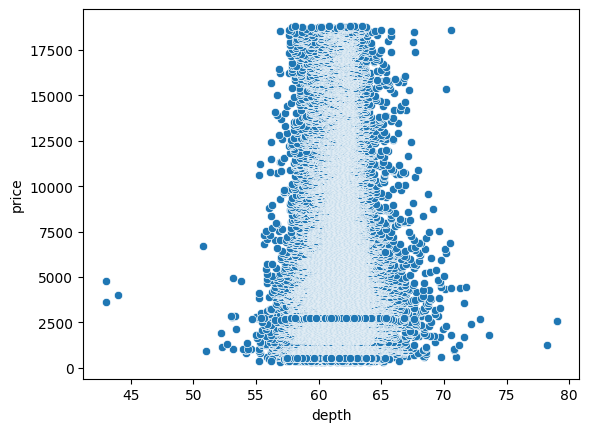

In [12]:
sns.scatterplot(x=df["depth"], y=df["price"])
plt.show()


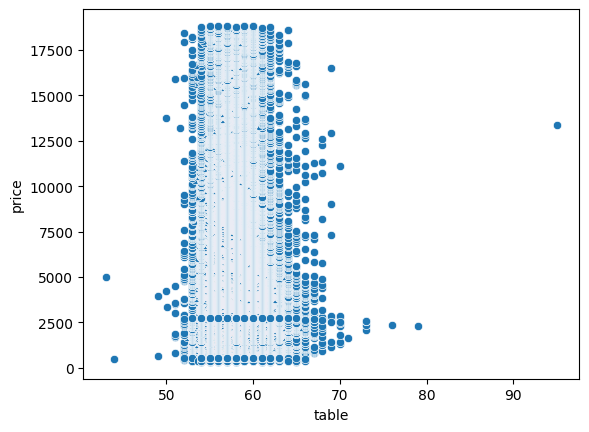

In [13]:
sns.scatterplot(x=df["table"], y=df["price"])
plt.show()

In [14]:
#Outlier datas

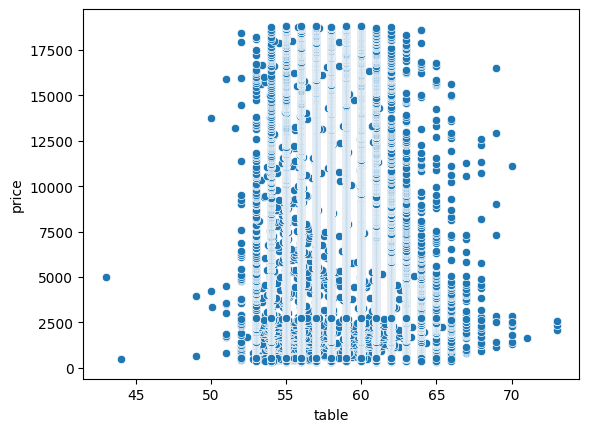

In [15]:
df = df[(df["table"] < 75) & (df["table"] > 40)]
sns.scatterplot(x=df["table"], y=df["price"])
plt.show()

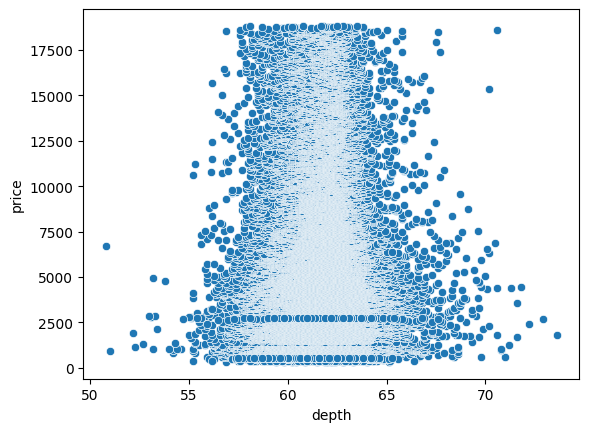

In [16]:
df = df[(df["depth"]<75) & (df["depth"] > 50)]
sns.scatterplot(x=df["depth"], y=df["price"])
plt.show()


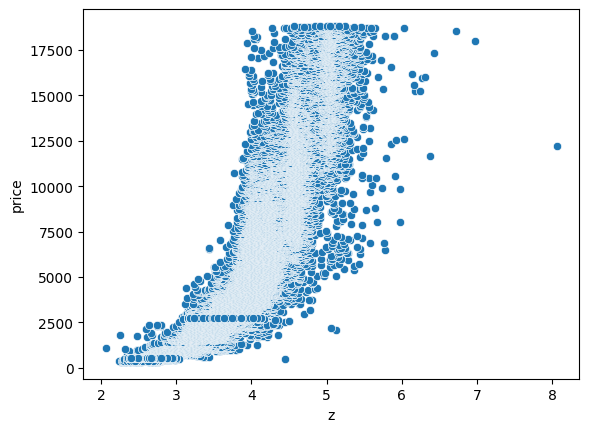

In [17]:
df = df[(df["z"]<30) & (df["z"]>2)]
sns.scatterplot(x=df["z"], y=df["price"])
plt.show()



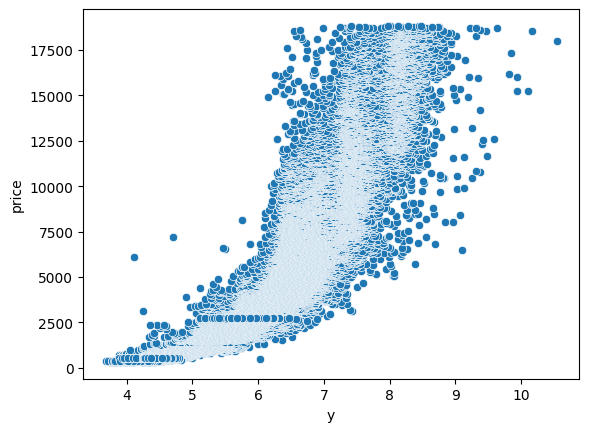

In [18]:
df = df[(df["y"]<30)]
sns.scatterplot(x=df["y"], y=df["price"])
plt.show()

In [19]:
df.describe()

,carat,depth,table,price,x,y,z
count,53905.000000,53905.000000,53905.000000,53905.000000,53905.000000,53905.000000,53905.000000
mean,0.797628,61.749545,57.455205,3930.643799,5.731476,5.733313,3.539443
std,0.473774,1.419739,2.222825,3987.264881,1.119402,1.111267,0.691446
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,73.000000,18823.000000,10.740000,10.540000,6.980000


In [20]:
X = df.drop('price',axis=1)
y = df['price']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
for col in ['cut','color','clarity']:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [26]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
15200,1.15,2,4,2,62.4,54.0,6.71,6.76,4.20
14632,1.11,3,1,2,61.3,58.0,6.66,6.61,4.07
19151,1.21,1,2,5,63.7,58.0,6.67,6.71,4.26
29299,0.30,2,5,5,61.5,58.0,4.28,4.31,2.64
9983,1.00,4,2,2,63.1,57.0,6.37,6.33,4.01


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train

array([[ 0.74613909, -0.5386873 ,  0.82420593, ...,  0.87723533,
         0.92711615,  0.95771644],
       [ 0.6617767 ,  0.43611464, -0.93762903, ...,  0.83258968,
         0.79219433,  0.76986741],
       [ 0.87268267, -1.51348924, -0.35035071, ...,  0.84151881,
         0.88214221,  1.04441599],
       ...,
       [ 0.45087073,  0.43611464, -1.52490735, ...,  0.66293621,
         0.62129336,  0.63981808],
       [-0.18184719, -1.51348924,  0.23692761, ..., -0.06925244,
        -0.05331572,  0.11962078],
       [ 0.34541774,  1.41091658,  0.23692761, ...,  0.55578665,
         0.58531421,  0.43751913]])

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lin_reg = LinearRegression()

In [33]:
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error,r2_score

Score :  0.8848902306205189
Mae :  867.7716773299007


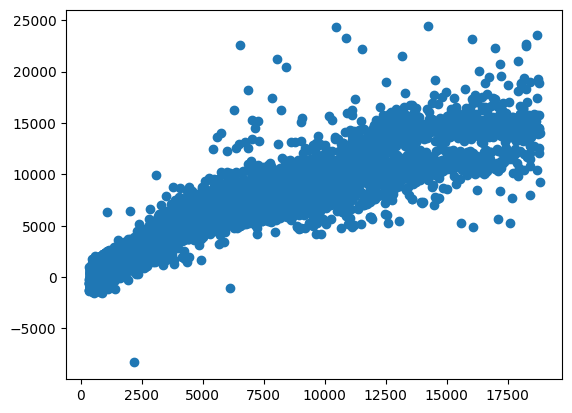

In [35]:
print("Score : ", r2_score(y_test, y_pred))
print("Mae : ", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

In [36]:
from sklearn.svm import SVR

Score :  0.4926363519327641
Mae :  1397.853335232954


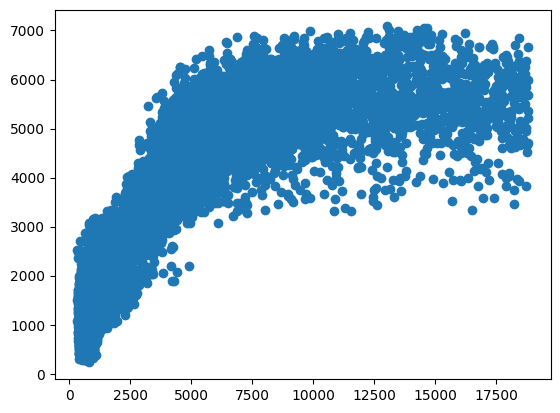

In [37]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("Score : ", r2_score(y_test, y_pred))
print("Mae : ", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [100,10,1,0.1],
    'gamma': [1, 0.1, 0.01],
    'kernel' : ['rbf','linear']
}

In [39]:
grid = GridSearchCV(estimator=SVR(), param_grid= param_grid, n_jobs=-1, refit=True,verbose=3)

In [40]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [41]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Score :  0.9340270809521153
Mae :  532.944435984068


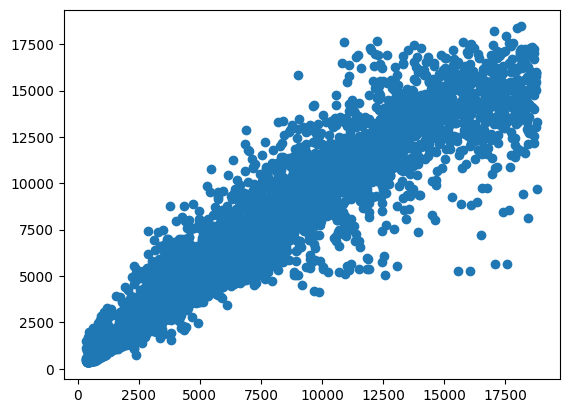

In [42]:
y_pred = grid.predict(X_test)
print("Score : ", r2_score(y_test, y_pred))
print("Mae : ", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()